<a href="https://colab.research.google.com/github/Pavankumar4512/projects/blob/main/crop_yield_predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error (MAE): 0.58
Root Mean Squared Error (RMSE): 0.73
R² Score: 0.89


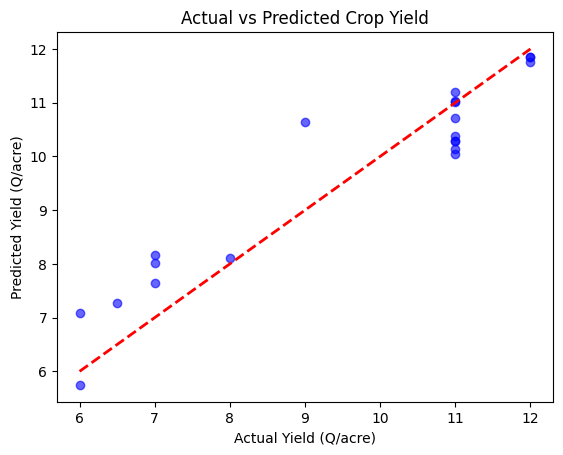

Predicted Yield: 9.62 Q/acre


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "crop_yield_data.xlsx"  # Change to your file path
df = pd.read_excel('/content/crop yield data sheet.xlsx')

# Convert 'Temperatue' column to numeric
df["Temperatue"] = pd.to_numeric(df["Temperatue"], errors="coerce")

# Drop rows with missing values
df_cleaned = df.dropna()

# Rename columns for easier handling
df_cleaned = df_cleaned.rename(columns={
    "Rain Fall (mm)": "Rainfall",
    "Yeild (Q/acre)": "Yield"
})

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=["Yield"])  # Independent variables
y = df_cleaned["Yield"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing predictions vs actual values
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Yield (Q/acre)")
plt.ylabel("Predicted Yield (Q/acre)")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

# Function to predict yield for new data
def predict_yield(rainfall, fertilizer, temperature, nitrogen, phosphorus, potassium):
    input_data = np.array([[rainfall, fertilizer, temperature, nitrogen, phosphorus, potassium]])
    input_scaled = scaler.transform(input_data)  # Apply scaling
    predicted_yield = model.predict(input_scaled)
    return predicted_yield[0]

# Example Prediction
new_yield = predict_yield(1000, 70, 30, 75, 20, 18)
print(f"Predicted Yield: {new_yield:.2f} Q/acre")
